In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.ticker as mtick

import numpy as np

import textwrap

from astropy.io import ascii

In [2]:
# Just a litte function so we can graph the planets with proper relative sizes
# Output min and max are 5 and 40 respectively
def planetScaling(radius):
    return 35*(radius - 1150)/(68850) + 5

In [3]:
def angularSizeChart():

    # read in data from spread sheet
    filename = "./datatable.csv"
    datalist = ascii.read(filename, format='csv')
    
    
    area = np.pi * (9**2) 
    categoriesDict = {#'Telescopes':[1,{'s':200,'marker':'h','color':"#8d00c6",'alpha':0.5}],
                      'Solar System':[1,{'s':100,"alpha":0.75,'color':'#ab1203'},
                                      {'color':'#ab1203','fontname':'Georgia', 'size':'12'}],
                      'Stars':[2,{'s':200,'marker':(8, 2, 45),'color':"#270584","alpha":0.75},
                               {'color':"#270584",'fontname':'Georgia', 'size':'12'}],
                      'Galaxies':[3,{'s':200,'marker':(16, 2, 30),'color':"#0467ca","alpha":0.75},
                                  {'color':"#0467ca",'fontname':'Georgia', 'size':'12'}],
                      'Extragalactic Objects':[4,{'s':200,'marker':(12, 2, 22.5),'color':"#005a03","alpha":0.75},
                                               {'color':"#005a03",'fontname':'Georgia', 'size':'12'}]}
    
    # set up figure 
    f, ax = plt.subplots(1,figsize=(15,9))
    f.set_facecolor('#fcf9f1')
    ax.set_axis_bgcolor('#fcf9f1')
    
    f.canvas.set_window_title("Angular Sizes")
    
    axisFont = {'fontname':'Georgia', 'size':'12'}
    titleFont = {'fontname':'Georgia', 'size':'24', 'weight':'bold'}
    annoteFont = {'fontname':'Georgia', 'size':'12'}
    
    ax.set_title("Angular Sizes",y=1.2,**titleFont)
    ax.text(10**3,10**19,"Brasseur, Busch, Serigano",**axisFont)   
    ax.text(1.4*10**-5,10**2,"Accuracy of GAIA",rotation=90,verticalalignment='center',**axisFont)
    ax.text(1.45*10**-4,10**2,"Accuracy of Keck",rotation=90,verticalalignment='center',**axisFont)
    ax.text(2.4*10**-4,10**2,"Accuracy of JWST",rotation=90,verticalalignment='center',**axisFont)
    ax.text(6*10**-4,10**2,"Accuracy of Hipparcos",rotation=90,verticalalignment='center',**axisFont)
    ax.text(1.1*10**-3,10**2,"Accuracy of Hubble",rotation=90,verticalalignment='center',**axisFont)
    ax.text(6.7*10**-1,5*10**5,"Typical seeing",rotation=90,verticalalignment='center',**axisFont)
    ax.text(2.3*10**3,5*10**5,"Size of finger at arm's length",rotation=90,verticalalignment='center',**axisFont)

    
    ticklocs = [10**x for x in range(-7,1)] + [60,3600]
    tickLabels = ['%.e mas'%(10**x) for x in range(-4,0)] + ["1 mas"] + \
                 ['%.e arcsec'%(10**x) for x in range(-2,0)] + ["1 arcsec","1 arcmin",u"1\u00b0"]
    
    ax.set_xscale("log")
    ax.set_xlabel("Angular Size",**axisFont)
    ax.set_xlim(10**-7,10**5)
    #ax.set_xticks([10**x for x in range(-7,5)])
    #ax.set_xticklabels(ax.get_xticks(), **axisFont)
    ax.set_xticks(ticklocs)
    ax.set_xticklabels(tickLabels, **annoteFont)
    #ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.e'))
    
    ax.set_yscale("log")
    #ax.yaxis.grid(True)
    #ax.set_ylim(0, len(categoriesDict) + 1)
    ax.set_ylim(10**-3, 10**16)
    #ax.set_yticks([10**x for x in range(-3,16)]) 
    #ax.set_yticklabels(ax.get_yticks(), **annoteFont)
    ax.set_yticks([(10**x)*(2.06*10**5) for x in range(-8,11)]) # putting y ticks in parsecs
    ax.set_yticklabels(["%.e"%(10**x) for x in range(-8,11)], **annoteFont)
    #ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.e'))
    ax.set_ylabel("Distance (parsecs)",**axisFont)
    
    # putting in references(on second axis for proper labeling)
    # and telescope info
    references = datalist[np.where(datalist['Category'] == 'Reference')]
    telescopes = datalist[np.where(datalist['Category'] == 'Telescopes')]
        
    #ax2 = ax.twiny()
    #ax2.set_xscale("log")
    #ax2.set_xlim(ax.get_xlim())
    #ax2.set_xticks(list(references['Angular Scale (arcseconds)']) + list(telescopes['Angular Scale (arcseconds)']))
    #ax2.set_xticklabels([x.replace('\\n','\n') for x in references['NickName']] + 
    #                    [x.replace('\\n','\n') for x in telescopes['NickName']], 
    #                    rotation=65,**axisFont)
    
    for ref in references:
        ax.axvline(ref['Angular Scale (arcseconds)'],color='#9c9c9c',linewidth=2,linestyle='--')   
    for scope in telescopes:
        ax.axvline(scope['Angular Scale (arcseconds)'],color='#a277b8',linewidth=2)
    
    
    # Adding distance references
    distRef = datalist[np.where(datalist['Category'] == 'DistanceRef')]
    for ref in distRef:
        ax.axhline(ref['Distance (AU)'],color='#9c9c9c',linewidth=2,linestyle='--')
        ax.annotate(ref['NickName'], xy=(1.5*10**-7,ref['Distance (AU)']),
                    xytext=(0,ref['Y Offset']),textcoords='offset points',**annoteFont)
    
    
    
    # Adding the planets
    planets = datalist[np.where(datalist['Category'] == 'Planet')]
    for p in np.unique(planets['NickName']):
        aPlanet = planets[np.where(planets['NickName'] == p)]
        ax.plot(aPlanet['Angular Scale (arcseconds)'],aPlanet['Distance (AU)'],
                'o-',linewidth=3,alpha=.75,color="#ab1203",markersize=10)
        ax.annotate(aPlanet['NickName'][0], xy=(aPlanet['Angular Scale (arcseconds)'][0],aPlanet['Distance (AU)'][0]),
                    xytext=(aPlanet['X Offset'][0],aPlanet['Y Offset'][0]), textcoords='offset points',
                    color="#ab1203",**annoteFont)

                                                    
    
    # putting in the rest of the data
    for cat in categoriesDict.keys():
        data = datalist[np.where(datalist['Category'] == cat)]
        ax.scatter(data['Angular Scale (arcseconds)'],data['Distance (AU)'],**categoriesDict[cat][1])
        for ob in data:
            ax.annotate(ob['NickName'].replace('\\n','\n'), xy=(ob['Angular Scale (arcseconds)'],ob['Distance (AU)']),
                        xytext=(ob['X Offset'],ob['Y Offset']), textcoords='offset points',
                        **categoriesDict[cat][2])
    
    # Adding range shapes for galaxies and stars (need improving)
    
    # Stars
    path_data = [
    (Path.MOVETO, (7*10**-17, 882300000000000)),
    (Path.LINETO, (10**-12, 882300000000000)),
    #(Path.CURVE3, (10**-8, 3*10**12)),  # waypoint 
    (Path.LINETO, (1.5*10**-2, 6*10**8)),
    #(Path.CURVE3, (2*10**-2, 10**7)), # waypoint    
    (Path.LINETO, (10**-2, 10**5)),
    #(Path.CURVE3, (7*10**-5, 3*10**6)), # waypoint    
    (Path.LINETO, (7*10**-7, 2*10**8)),
    #(Path.CURVE3, (7*10**-12, 3*10**12)), # waypoint 
    (Path.LINETO, (7*10**-17, 882300000000000)),
    (Path.CLOSEPOLY, (7*10**-17, 882300000000000)),
    ]
    codes, verts = zip(*path_data)
    path = Path(verts, codes)
    ax.add_patch(PathPatch(path, facecolor='#a093c2', alpha=0.25, edgecolor='none'))
    
    # Galaxies
    path_data = [
    (Path.MOVETO, (1,4*10**14)),
    (Path.LINETO, (1,2*10**15)),
    (Path.LINETO, (1.1*10**4,3*10**11)), 
    (Path.LINETO, (2.2*10**4,10**10)), 
    (Path.LINETO, (2*10**4,4*10**9)),  
    (Path.LINETO, (1,4*10**14)),
    (Path.CLOSEPOLY, (1,4*10**14)),
    ]
    codes, verts = zip(*path_data)
    path = Path(verts, codes)
    ax.add_patch(PathPatch(path, facecolor='#63a3e3', alpha=0.25, edgecolor='none'))
    
    
    plt.tight_layout()    
    plt.savefig('angularSize.pdf')
    plt.show()


/home/michael/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Georgia'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/michael/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


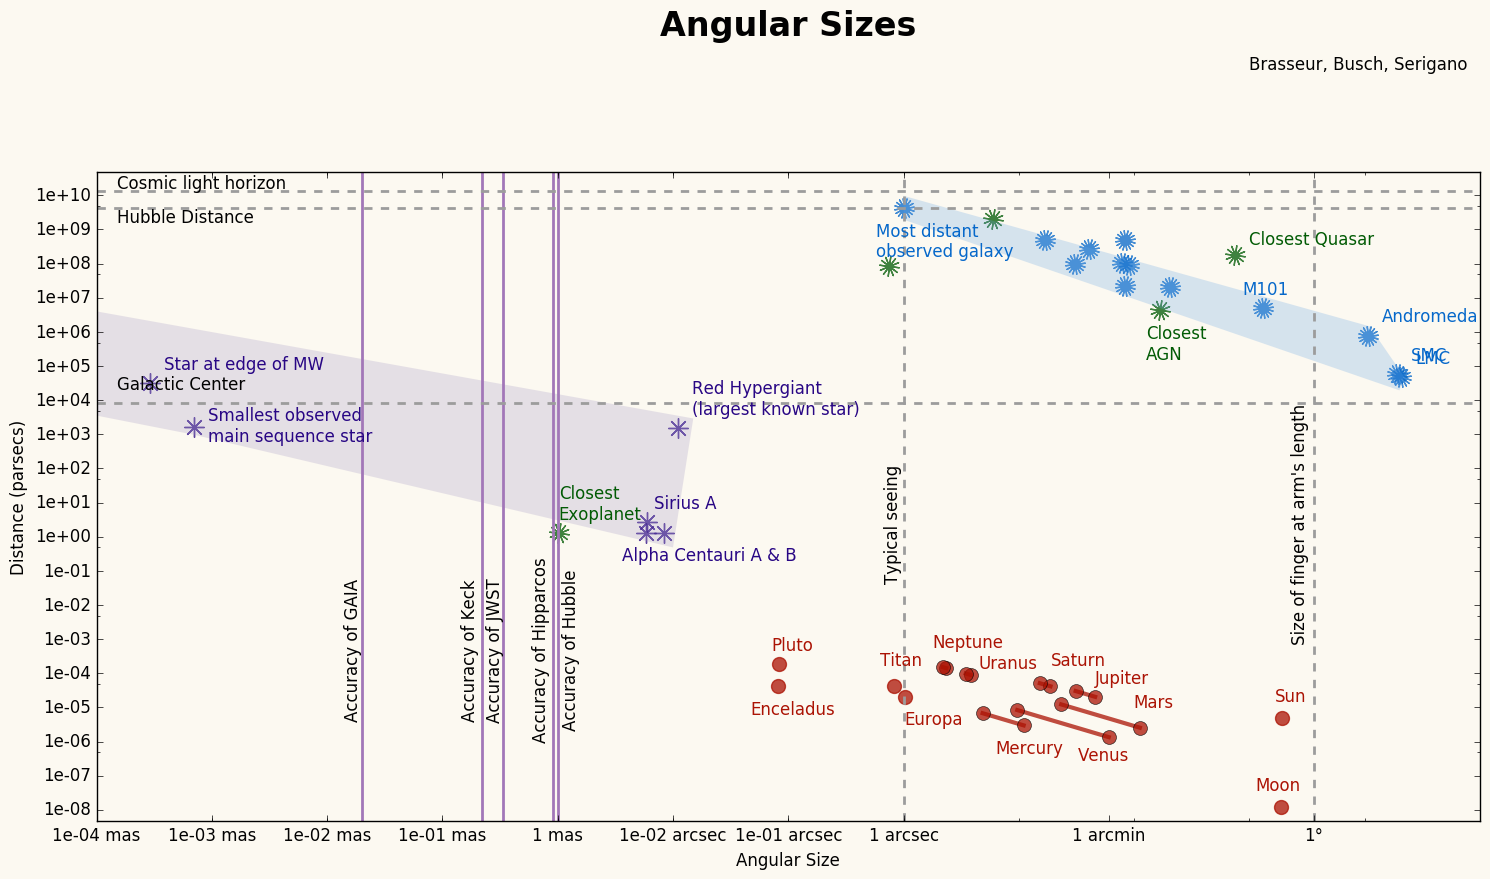

In [13]:
angularSizeChart()